## Data Storytelling

1. Ask the following questions and look for the answers using code and plots:
    1. Can you count something interesting?
    2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
    3. Can you make a bar plot or a histogram?
    4. Can you compare two related quantities?
    5. Can you make a scatterplot?
    6. Can you make a time-series plot?
    
2. Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

3. Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?


In [6]:
#run DataClean.py to grab training dataset
%run -i DataClean.py

#The ID column is person and the idhogar column is per household. 
#create new dataframe consisting of only head of households (this also will give unique households)
hohDF = trainDF.loc[trainDF['parentesco1'] == 1]
#double check to see that all values of idhogar are unique
print(any(hohDF['idhogar'].duplicated()))
print(hohDF.shape)


False
(2970, 137)


To familiarize myself with the data I first ran some basic counts.  I ran overall Target value counts to see how many of the households fell into with Target. Out of the 2,970 households in the training data only 222 fell into Target 1 of extreme poverty.  442 households fell into target 2 of moderate poverty and 355 households fell into Target 3 of vulnerable households. Most households fell into Target level 4, nonvulnerable households, with a count of 1,951. 

I also wanted to take a look at the age distribution for the head of households provided in the data and found that the majority age group was from around 30 - 60.

I also wanted to see if having a undergraduate level degree or higher affected which Target level the household would fall into.  I found that although the number of those with a degree was signigicantly less than those without, the majority of those with a degree fell into the two higher Target values. 

Target Value Overall Totals for Head of Households 
 1     222
2     442
3     355
4    1951
Name: Target, dtype: int64 



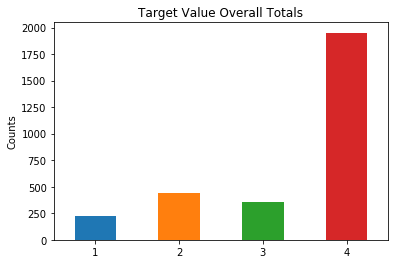

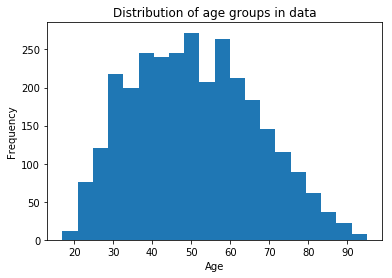

undergraduate or higher level of education
 instlevel8  Target
0           1          215
            2          431
            3          338
            4         1491
1           1            7
            2           11
            3           17
            4          460
Name: instlevel8, dtype: int64


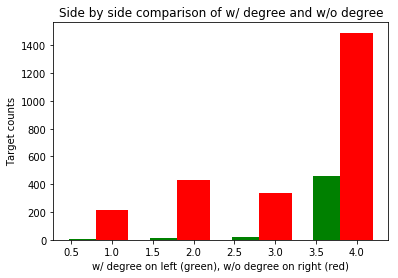

In [3]:
# Target values 
# 1 = extreme poverty
# 2 = moderate poverty
# 3 = vulnerable households
# 4 = nonvulnerable households

#function to get target values for binary columns (1 = yes, 0 = no)
def TargetCountsOne(colname):
	TCounts = hohDF[hohDF[colname] == 1]['Target'].value_counts().sort_index()
	return TCounts

#funcion to get target values when col1 and col2 are both true (1 = yes, 0 = no)
def TargetCountsTwo(col1, col2):
	TCounts = hohDF[(hohDF[col1] == 1) & (hohDF[col2] == 1)]['Target'].value_counts()
	return TCounts

#head of household counts for how many households fall into each category. parentesco1 = person is head of household                                                           
hohTarget = TargetCountsOne('parentesco1')
print("Target Value Overall Totals for Head of Households \n", hohTarget, '\n')

#Bar plot to show Target value Totals
hohTarget.plot(y = hohTarget, kind='bar', rot=0)
plt.title('Target Value Overall Totals')
plt.ylabel('Counts')
plt.show()

#Looked at the distribution for age in the data using a histogram
plt.title('Distribution of age groups in data')
plt.hist(hohDF['age'], bins = 20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# if home is located in urban area area1 = urban
TargetCountsOne('area1')
#if home is located in rural area area2 = rural
TargetCountsOne('area2')

#counts for having an undergraduate degree or higher corresponds to poverty Target (instlevel8: 1 = has degree, 0 = does not have degree)
hasDegree = hohDF.groupby(['instlevel8','Target'])
count_hasDegree = hasDegree['instlevel8'].count()
print("undergraduate or higher level of education\n", count_hasDegree)

#Side by side bar plot to compare target values for head of households with and without undergrad or higher degree
indices = [1,2,3,4]
degree = count_hasDegree[1]
noDegree = count_hasDegree[0]
width = np.min(np.diff(indices))/3

fig, ax = plt.subplots()
bar1 = plt.bar(indices - width, degree, color = 'green', width = 0.4, label = 'degree')
bar2 = plt.bar(indices, noDegree, color = 'red', width = 0.4, label = 'noDegree')
plt.title('Side by side comparison of w/ degree and w/o degree')
plt.xlabel('w/ degree on left (green), w/o degree on right (red)')
plt.ylabel('Target counts')

plt.show()


Does level of education effect economic target?

I wanted to further explore the effect that education level had on the households economic target value so I ran overall total counts and created bar graphs for the columns that marked the level of education that each head of household had completed.  The columns were the following:

instlevel1 = no level of eductaion
instlevel2 = completed primary education
instlevel5 = completed academic secondary level
instelevel7 = completed technical secondary level
instlevel8 = completed undergraduate and higher education
instlevel9 = post graduate or higher education

    
Found that higher level of education had reduced totals of extreme poverty and moderate poverty. Looking at the bar graphs although the red bar for target value 4 is significantly higher in comparison to the other values I saw that the bars for 1, 2 and 3 continue to decrease as the education level rises.  There were no cases of extreme poverty for those with a post graduateeducation.  I also found that out the the 34 head of households with a technical secondary level education only 1 was in a household that fell in the extreme poverty value and only one in a vulnerable household.  The majority were in target level 4.   	

Target Values for no level of education


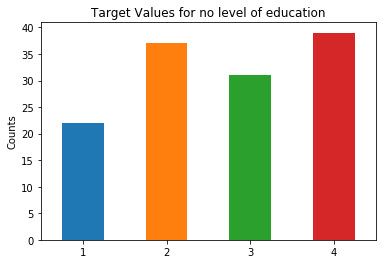

Target Values for complete primary education


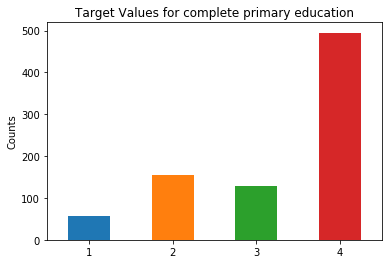

Target Values for complete primary education 
 1     21
2     38
3     28
4    266
Name: Target, dtype: int64 



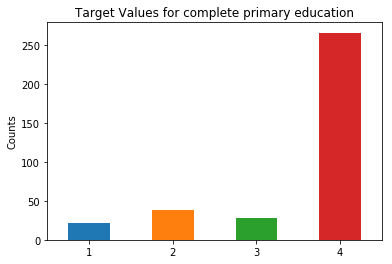

Target Values for complete technical secondary level education 
 1     1
2     1
3     1
4    31
Name: Target, dtype: int64 



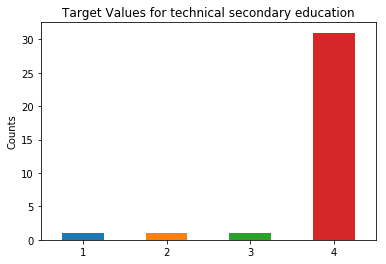

Target Values for undergraduate and higher education 
 1      7
2     11
3     17
4    460
Name: Target, dtype: int64 



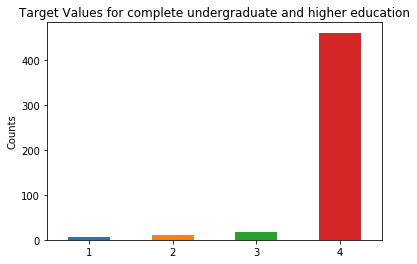

Target Values for post graduate or higher education 
 2     1
3     1
4    86
Name: Target, dtype: int64 



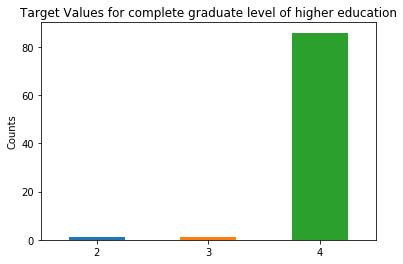

In [4]:
#count for higher education levels

#instlevel1 = no level of education
level1Target = TargetCountsOne('instlevel1')
print("Target Values for no level of education")
#bar chart for instlevel1 Targets
level1Target.plot(y=level1Target, kind='bar', rot=0)
plt.title('Target Values for no level of education')
plt.ylabel('Counts')
plt.show()

#instlevel3 = no level of education
level3Target = TargetCountsOne('instlevel3')
print("Target Values for complete primary education")
#bar chart for instlevel3 Targets
level3Target.plot(y=level3Target, kind='bar', rot=0)
plt.title('Target Values for complete primary education')
plt.ylabel('Counts')
plt.show()

#instlevel5 = complete primary
level5Target = TargetCountsOne('instlevel5')
print("Target Values for complete primary education \n", level5Target, '\n')
#bar chart of instlevel5 Targets
level5Target.plot(y=level5Target, kind='bar', rot=0)
plt.title('Target Values for complete primary education')
plt.ylabel('Counts')
plt.show()

#instlevel7 = complete technical secondary level
level7Target = TargetCountsOne('instlevel7')
print("Target Values for complete technical secondary level education \n", level7Target, '\n')
#bar chart for instlevel7 Targets
level7Target.plot(y=level7Target, kind='bar', rot=0)
plt.title('Target Values for technical secondary education')
plt.ylabel('Counts')
plt.show()

#instlevel8 = undergraduate higher education
level8Target = TargetCountsOne('instlevel8')
print("Target Values for undergraduate and higher education \n", level8Target, '\n')
#bar chart for instlevel7 Targets
level8Target.plot(y=level8Target, kind='bar', rot=0)
plt.title('Target Values for complete undergraduate and higher education')
plt.ylabel('Counts')
plt.show()

#instlevel9 = postgraduate higher education
level9Target = TargetCountsOne('instlevel9')
print("Target Values for post graduate or higher education \n", level9Target, '\n')
#bar chart for instlevel9 Targets
level9Target.plot(y=level9Target, kind='bar', rot=0)
plt.title('Target Values for complete graduate level of higher education')
plt.ylabel('Counts')
plt.show()


I then wanted to see how children affected the education values.  I used the following two columns:

hogar_nin = number of children in the household (0-9)
escolar = years of schooling (0-21)

I created a scatter plot to see what the trend was for education and children and as years of schooling for head of households goes up the amount of children in the household goes down.  Looking at the graph 7 years of schooling and 3 children in the household looked like good reference points to use as when creating the bar graphs for target value counts.

From the bar graphs below in both cases, whether the head of household had greater than 7 years of schooling or less than 7 years of schooing, the amount of children in the household decreased the amount of households in the upper two economic target levels (3,4) and increased the amount of the lower two economic target levels (1,2).  Although, for those with more than 7 years of schooling there were overall more households in the upper 2 economic target values. 


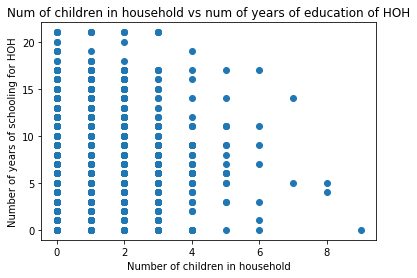

Target counts for household with no children and years of school < 7
 1     49
2    124
3    109
4    445
Name: Target, dtype: int64 



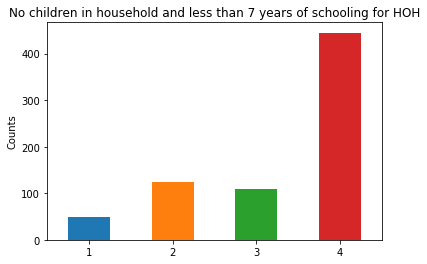

Target counts for household with at least one child and years of school < 7
 1     96
2    191
3    139
4    316
Name: Target, dtype: int64 



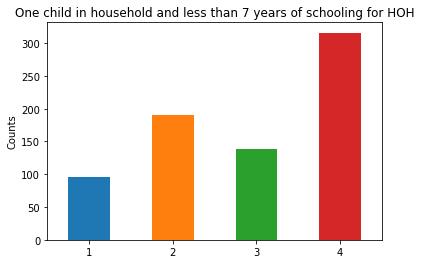

Target counts for household with at least 2 children and years of school < 7
 1     56
2    121
3     82
4    141
Name: Target, dtype: int64 



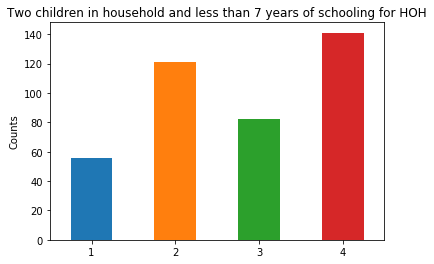

Target counts for household with at least 3 children and years of school < 7
 1    30
2    68
3    31
4    37
Name: Target, dtype: int64 



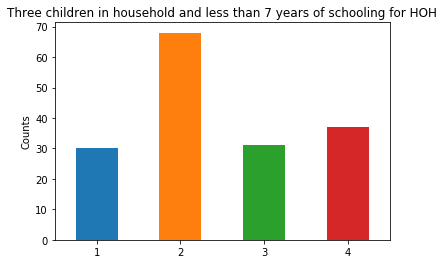

Target counts for household with no children and years of school > 7
 1     16
2     24
3     21
4    551
Name: Target, dtype: int64


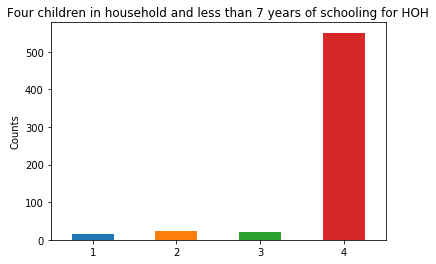

Target counts for household with at least one child and years of school > 7
 1     47
2     84
3     70
4    569
Name: Target, dtype: int64 



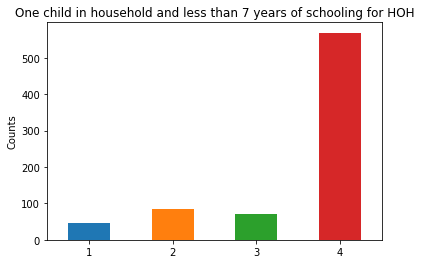

Target counts for household with at least 2 children and years of school > 7
 1     33
2     61
3     41
4    252
Name: Target, dtype: int64 



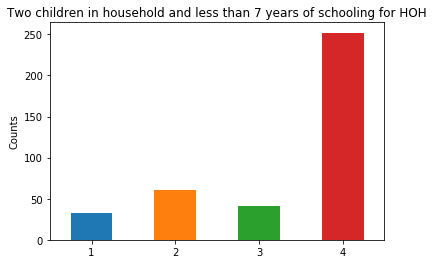

Target counts for household with at least 3 children and years of school > 7
 1    18
2    27
3    18
4    56
Name: Target, dtype: int64 



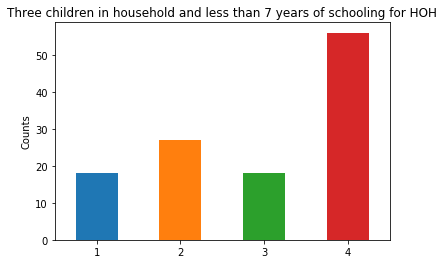

In [5]:
#Counts for head of household level of education

#save column values into variables
numOfChildren = hohDF['hogar_nin']
numOfEdYears  = hohDF['escolari']

#scatter plot for number of children in household and years of schooling for the head of houshold
plt.title('Num of children in household vs num of years of education of HOH')
plt.scatter(numOfChildren, numOfEdYears)
plt.xlabel('Number of children in household')
plt.ylabel('Number of years of schooling for HOH')
plt.show()

#Target values for less than 7 years of schooling for head of households

#count for no children in household and less than 7 years of schooling for HOH and bar chart representation
ChildrenSchool = hohDF[(hohDF['hogar_nin'] < 1) & (hohDF['escolari'] < 7)]['Target'].value_counts().sort_index()
print("Target counts for household with no children and years of school < 7\n", ChildrenSchool, '\n')

ChildrenSchool.plot(y=ChildrenSchool, kind='bar', rot=0)
plt.title('No children in household and less than 7 years of schooling for HOH')
plt.ylabel('Counts')
plt.show()

#count for one child in household 
ChildrenSchool1 = hohDF[(hohDF['hogar_nin'] >= 1) & (hohDF['escolari'] < 7)]['Target'].value_counts().sort_index()
print("Target counts for household with at least one child and years of school < 7\n", ChildrenSchool1, '\n')

ChildrenSchool1.plot(y=ChildrenSchool1, kind='bar', rot=0)
plt.title('One child in household and less than 7 years of schooling for HOH')
plt.ylabel('Counts')
plt.show()

#count for two children in household 
ChildrenSchool2 = hohDF[(hohDF['hogar_nin'] >= 2)& (hohDF['escolari'] < 7)]['Target'].value_counts().sort_index()
print("Target counts for household with at least 2 children and years of school < 7\n", ChildrenSchool2, '\n')

ChildrenSchool2.plot(y=ChildrenSchool2, kind='bar', rot=0)
plt.title('Two children in household and less than 7 years of schooling for HOH')
plt.ylabel('Counts')
plt.show()

#count for three children in household 
ChildrenSchool3 = hohDF[(hohDF['hogar_nin'] >= 3) & (hohDF['escolari'] < 7)]['Target'].value_counts().sort_index()
print("Target counts for household with at least 3 children and years of school < 7\n", ChildrenSchool3, '\n')

ChildrenSchool3.plot(y=ChildrenSchool3, kind='bar', rot=0)
plt.title('Three children in household and less than 7 years of schooling for HOH')
plt.ylabel('Counts')
plt.show()

#Target values for more than 7 years of schooling for head of household

#count for no children in household 
ChildrenSchool4 = hohDF[(hohDF['hogar_nin'] < 1) & (hohDF['escolari'] > 7)]['Target'].value_counts().sort_index()
print("Target counts for household with no children and years of school > 7\n", ChildrenSchool4)

ChildrenSchool4.plot(y=ChildrenSchool4, kind='bar', rot=0)
plt.title('Four children in household and less than 7 years of schooling for HOH')
plt.ylabel('Counts')
plt.show()

#count for one child
ChildrenSchool5 = hohDF[(hohDF['hogar_nin'] >= 1) & (hohDF['escolari'] > 7)]['Target'].value_counts().sort_index()
print("Target counts for household with at least one child and years of school > 7\n", ChildrenSchool5, '\n')

ChildrenSchool5.plot(y=ChildrenSchool5, kind='bar', rot=0)
plt.title('One child in household and less than 7 years of schooling for HOH')
plt.ylabel('Counts')
plt.show()

#count for two children
ChildrenSchool6 = hohDF[(hohDF['hogar_nin'] >= 2)& (hohDF['escolari'] > 7)]['Target'].value_counts().sort_index()
print("Target counts for household with at least 2 children and years of school > 7\n", ChildrenSchool6, '\n')

ChildrenSchool6.plot(y=ChildrenSchool6, kind='bar', rot=0)
plt.title('Two children in household and less than 7 years of schooling for HOH')
plt.ylabel('Counts')
plt.show()

#count for three children
ChildrenSchool7 = hohDF[(hohDF['hogar_nin'] >= 3) & (hohDF['escolari'] > 7)]['Target'].value_counts().sort_index()
print("Target counts for household with at least 3 children and years of school > 7\n", ChildrenSchool7, '\n')

ChildrenSchool7.plot(y=ChildrenSchool7, kind='bar', rot=0)
plt.title('Three children in household and less than 7 years of schooling for HOH')
plt.ylabel('Counts')
plt.show()
